<a href="https://colab.research.google.com/github/waewma/Thailand_Accident_Jan-Jun2022/blob/main/Thailand_accident_Jan_Jun2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **อุบัติเหตุบนถนนในประเทศไทย ระหว่างมกราคมถึงมิถุนายน 2565**
จากเหตุการณ์อุบัติเหตุที่เห็นเป็นข่าวล่าสุด ที่กลุ่มวัยรุ่นขับรถ BMW ขับรถชนมอเตอร์ไซค์ จนเป็นเหตุให้คนขับมอเตอร์ไซค์เสียชีวิต ณ ที่เกิดเหตุ ช่วงเดือนตุลาคม 2565 ซึ่งเป็นเหตุการณ์สูญเสียที่ไม่มีใครอยากให้เกิดขึ้น ไม่ว่าจะเกิดจากความประมาทของตัวเราเอง หรือผลกระทบจากความประมาทของผู้อื่น 

จึงเป็นที่มาของการนำเอาข้อมูลอุบัติเหตุบนถนนในประเทศไทยมาทำการศึกษา เพื่อตอบคำถามข้อสงสัยต่อไปนี้
1. ช่วงเวลาไหนที่เกิดอุบัติเหตุเยอะที่สุดและทำให้เกิดการสูญเสียมากที่สุด?
2. สภาพอากาศมีผลต่อการเกิดอุบัติเหตุหรือไม่?
3. อะไรคือมูลเหตุสันนิษฐานหลักของการเกิดอุบัติเหตุในแต่ละครั้ง??
3. จากมูลเหตุสันนิษฐานหลัก ทำให้เกิดลักษณะอุบัติเหตุแบบใดบ้าง และมีการสูญเสียเป็นอย่างไร?




In [1]:
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

## **ดาวน์โหลดฟอนท์ภาษาไทยสำหรับ Matplotlib**
เนื่องจากชุดข้อมูลนี้เป็นภาษาไทย การแสดงผลผ่านกราฟ ฟอนท์อาจจะไม่รองรับ ซึ่งสามารถแก้ปัญหาได้ด้วยการโหลดฟอนท์และติดตั้ง ตามลิงค์ด้านล่าง (ขอบคุณเจ้าของโพสต์สำหรับวิธีการแก้ปัญหาเรื่องการแสดงผลภาษาไทย)
https://www.facebook.com/groups/colab.thailand/permalink/1421960354645985/

In [2]:
#Download font Thai
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')


replace THSarabunChula-Regular.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


## **ดาวน์โหลดชุดข้อมูล**
ชุดข้อมูลนี้สามารถดาวน์โหลดได้จากเว็บไซต์ของกระทรวงคมนาคม มีทั้งหมด 37 columns และ 10791 rows มีบางคอลัมน์ที่มีข้อมูลไม่ครบ ซึ่งไม่ได้มีผลต่อการทำการศึกษาและวิเคราะห์ข้อมูลนี้ 

คอลัมน์ที่ใช้ประกอบด้วย เวลา, จังหวัด, รถคันที่ 1, มูลเหตุสันนิษฐาน, ลักษณะการเกิดอุบัติเหตุ, สภาพอากาศ, จำนวนผู้เสียชีวิต, จำนวนผู้บาดเจ็บสาหัส, จำนวนผู้บาดเจ็บเล็กน้อย, รวมจำนวนผู้บาดเจ็บ

ซึ่งคอลัมน์ที่ใช้เหล่านี้ มีการเก็บข้อมูลที่ค่อนข้างดี การสะกดตัวอักษรและคำเป็นไปอย่างถูกต้องทั้งหมด ไม่ต้องมีการแก้ไขข้อมูลใด

ทั้งนี้หากต้องการนำข้อมูลไปใช้และนอกเหนือจากคอลัมน์ที่ใช้ในการวิเคราะห์ข้อมูลครั้งนี้ อาจจะต้องตรวจสอบเพิ่มเติมและจัดการข้อมูลให้เหมาะสมกับสิ่งที่ต้องการศึกษาอีกทีหนึ่ง

In [3]:
df_accident = pd.read_csv('https://datagov.mot.go.th/dataset/7e077ffd-dc4f-4dc6-a71c-0813726f3c12/resource/733b7874-bd5f-44b9-b271-650890b061f2/download/accident2022.csv')  
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10791 entries, 0 to 10790
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ปีที่เกิดเหตุ                            10791 non-null  int64  
 1   วันที่เกิดเหตุ                           10791 non-null  object 
 2   เวลา                                     10791 non-null  object 
 3   วันที่รายงาน                             10790 non-null  object 
 4   เวลาที่รายงาน                            10790 non-null  object 
 5   ACC_CODE                                 10791 non-null  int64  
 6   หน่วยงาน                                 10791 non-null  object 
 7   รหัสสายทาง                               10791 non-null  object 
 8   สายทาง                                   10791 non-null  object 
 9   ก.ม.                                     10668 non-null  float64
 10  จังหวัด                                  10788

In [4]:
df=df_accident

## **ช่วงเวลาไหนที่เกิดอุบัติเหตุเยอะที่สุดและทำให้เกิดการสูญเสียมากที่สุด**?

คอลัมน์ที่จะนำมาใช้เพื่อตอบคำถามนี้คือ เวลา, จำนวนผู้เสียชีวิต และรวมจำนวนผู้บาดเจ็บ ซึ่งคอลัมน์เหล่านี้มีข้อมูลครบ จึงสามารถนำมาใช้ได้เลย

แต่เนื่องจาก คอลัมน์เวลา มี data type เป็น object จึงต้องมีการเปลี่ยนให้เป็น datetime ก่อนเพื่อให้ง่ายต่อการกรุ๊ปข้อมูลตามช่วงเวลา

In [5]:
#Convert 'เวลา' from object to time
df['เวลา'] = pd.to_datetime(df['เวลา'], format = "%H:%M")

#change dataframe to count the total event by hour
df['เวลา'] = pd.to_datetime(df['เวลา']).dt.hour

เวลาที่เกิดอุบัติเหตุเยอะที่สุดคือช่วง 15.00-17.00 น. และน้อยที่สุดคือช่วง 3.00-4.00 น.

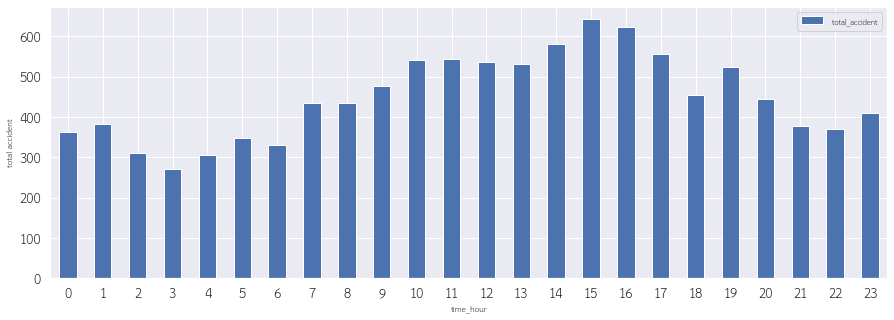

In [6]:
accident=df.groupby('เวลา').agg(total_accident=('เวลา','count'))
accident.plot.bar(xlabel='time_hour',ylabel='total accident',rot=0, figsize=(15,5),edgecolor='white',fontsize=20)

ต้องการดูช่วงเวลาที่เกิดอุบัติเหตุแล้วทำให้มีคนเสียชีวิตสูงที่สุด ซึ่งจะพบว่าคือช่วงเวลา 19.00 - 21.00 น.

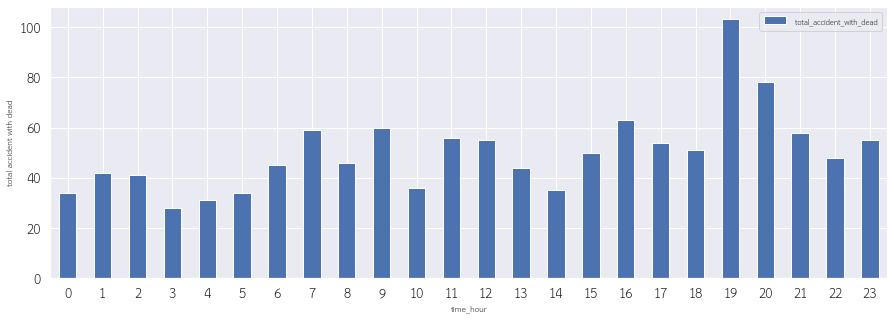

In [7]:
#Filter only row that has total dead > 0 and plot as bar chart
dead=df.loc[df['จำนวนผู้เสียชีวิต']>0]
dead1=dead.groupby('เวลา').agg(total_accident_with_dead=('เวลา','count'))
dead1.plot.bar(xlabel='time_hour',ylabel='total accident with dead',rot=0, figsize=(15,5),edgecolor='white',fontsize=20)

เปรียบเทียบการเกิดอุบัติเหตุและอุบัติเหตุที่มีผู้เสียขีวิตจะพบว่าช่วงเวลามีความแตกต่างกัน

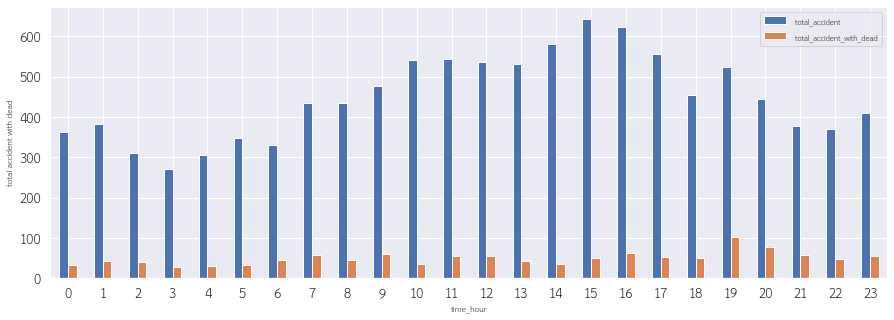

In [8]:
accident_dead=pd.merge(accident, dead1, left_index=True, right_index=True)
accident_dead.plot.bar(xlabel='time_hour',ylabel='total accident with dead',rot=0, figsize=(15,5),edgecolor='white',fontsize=20)

ซึ่งช่วงเวลาดังกล่าวคือเป็นเหตุการณ์ที่เกิดขึ้นที่ต่างจังหวัดเป็นส่วนใหญ่ ไม่ใช่ในกรุงเทพมหานคร

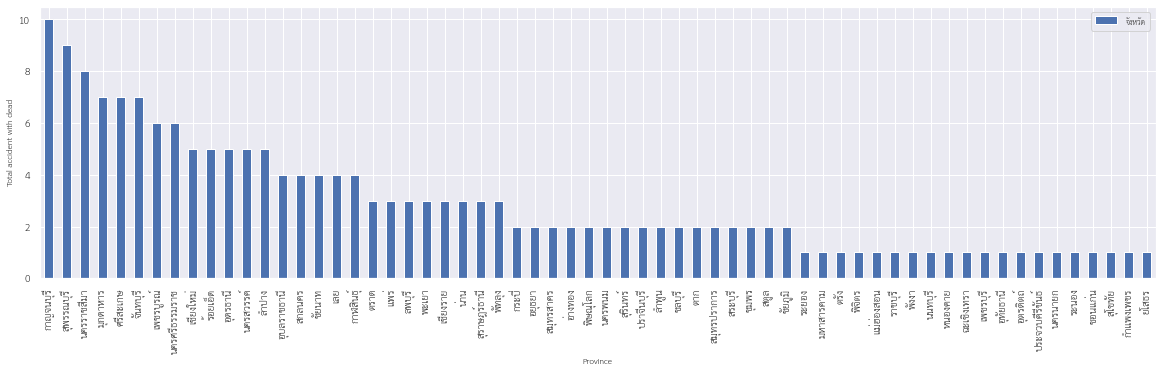

In [9]:
dead_peak=dead.loc[(dead['เวลา']==19)|(dead['เวลา']==20)]
dead_peak=pd.DataFrame(dead_peak['จังหวัด'].value_counts(ascending=False))
dead_peak.plot.bar(xlabel='Province',ylabel='Total accident with dead', figsize=(20,5), fontsize=15)

ถ้าลองดูว่าแล้วอุบัติเหตุที่มีคนเสียชีวิตในกรุงเทพมหานครส่วนใหญ่คือ ช่วง 23.00 - 01.00 น. ซึ่งเป็นช่วงกลางคืนที่มีจำนวนรถบนถนนค่อนข้างน้อย รถส่วนมากจะติดทำให้โอกาสการเกิดอุบัติเหตุจนมีผู้เสียชีวิตน้อยลง


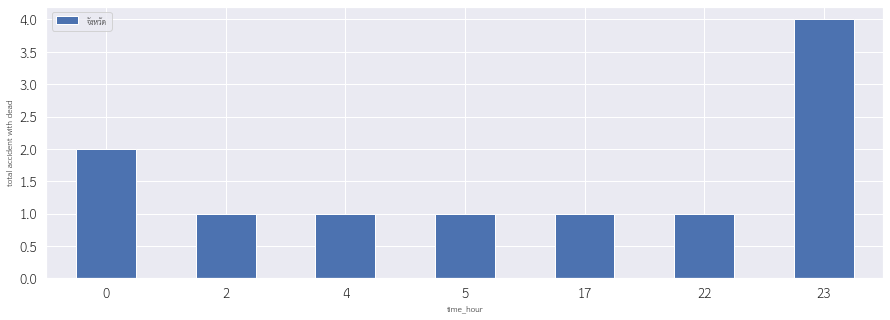

In [10]:
BKK=df.loc[(df['จำนวนผู้เสียชีวิต']>0)&(df['จังหวัด'].str.contains('กรุงเทพ',case=False))]
BKK=BKK.groupby(['เวลา'])[['จังหวัด']].count()

BKK.plot.bar(xlabel='time_hour',ylabel='total accident with dead',rot=0, figsize=(15,5),edgecolor='white',fontsize=20)

Heat map สำหรับอุบัติเหตุที่มีคนเสียชีวิตในแต่ละช่วงเวลาของแต่ละจังหวัดมีเกิดขึ้นในช่วงเวลาที่แตกต่างกัน

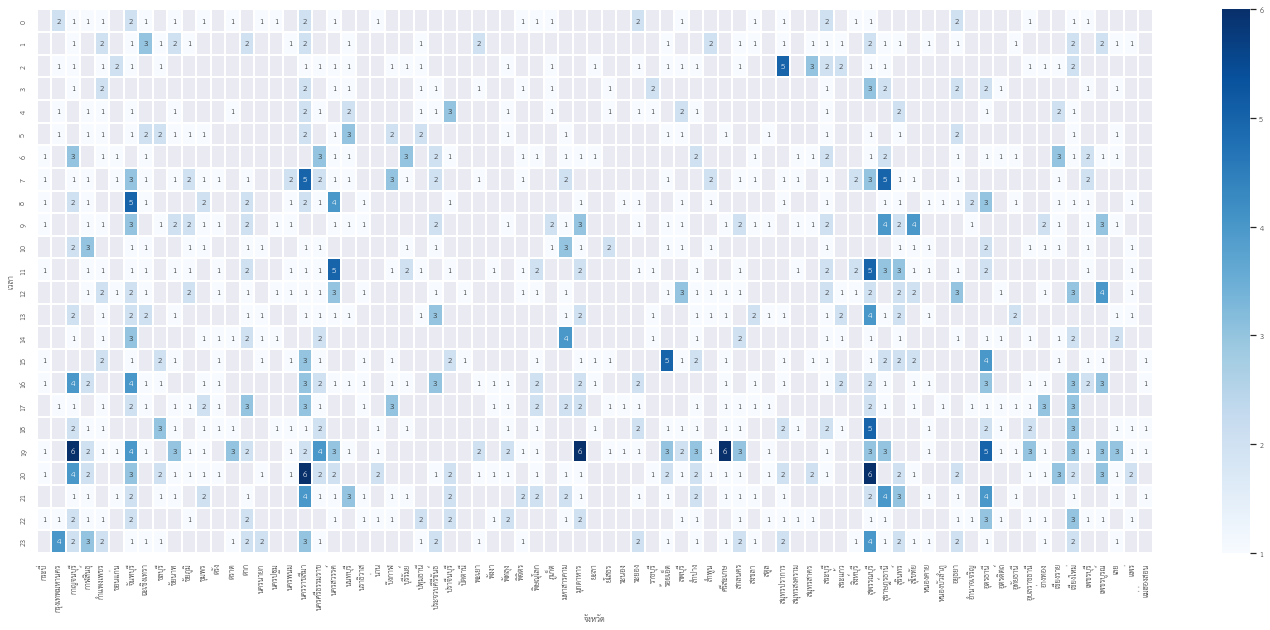

In [11]:
province_dead=df.loc[df['จำนวนผู้เสียชีวิต']>0]
province_dead=province_dead.pivot_table(index='เวลา', columns='จังหวัด', values='วันที่เกิดเหตุ', aggfunc='count')
sns.set(rc={'figure.figsize':(25,10)},font_scale=1,font='TH Sarabun Chula')
ax = sns.heatmap(province_dead, linewidths=1, cmap='Blues', annot=True, fmt='.0f')

## **สภาพอากาศมีผลต่อการเกิดอุบัติเหตุหรือไม่?**

จากชุดข้อมูลพบว่าอุบัติเหตุส่วนใหญ่เกิดขึ้นในช่วงเวลาที่อากาศปกติ ซึ่งไม่ได้มีผลต่อวิสัยทัศน์ในการขับขี่ ซึ่งได้ผลเช่นเดียวกันกับการเกิดอุบัติเหตุที่มีผู้เสียชีวิต

การที่ข้อมูลแสดงสถิติเช่นนี้ คาดว่าช่วงที่วิสัยทัศน์ไม่ดี ผู้ขับขี่มักจะใช้ความระมัดระวังมากยิ่งขึ้น จึงส่งผลให้โอากาสในการเกิดอุบัติเหตุน้อยกว่าช่วงที่อากาศแจ่มใสได้เช่นกัน

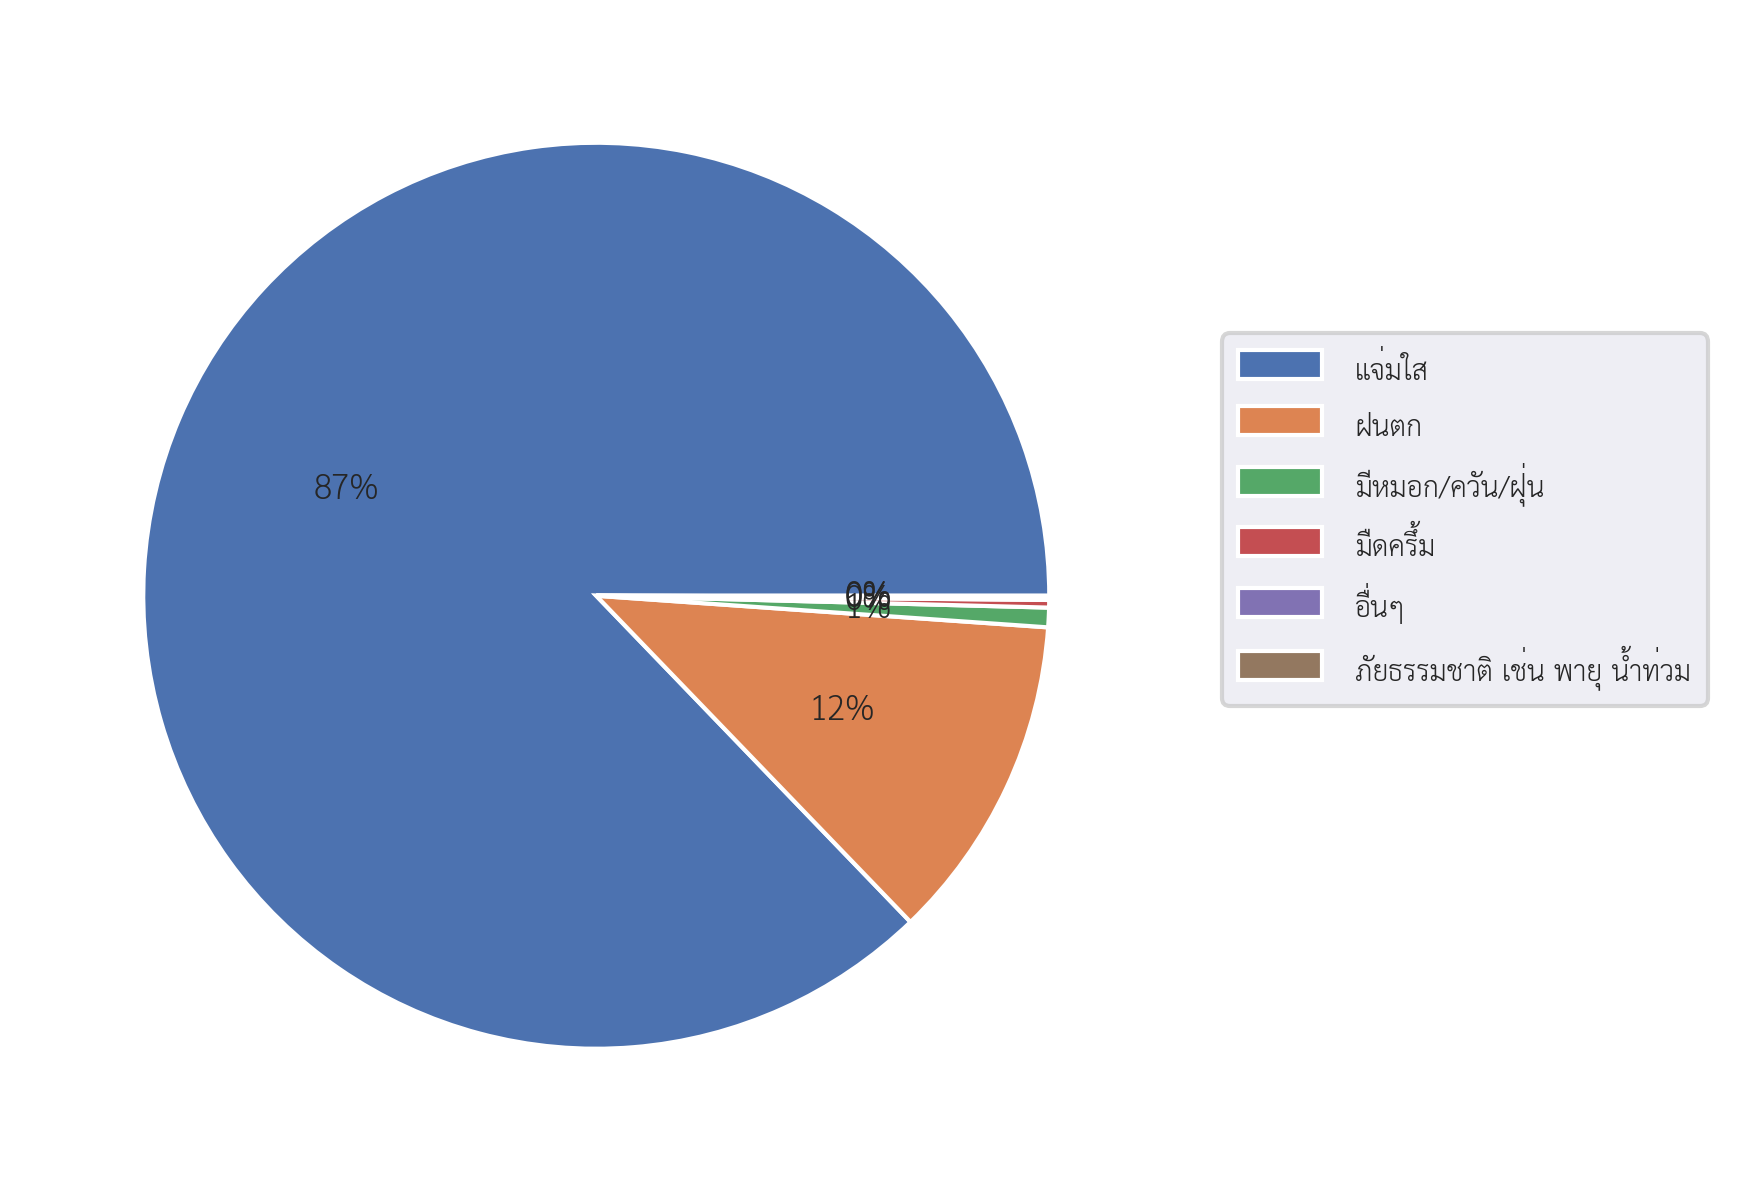

In [12]:
weather=pd.DataFrame(df['สภาพอากาศ'].value_counts(ascending=False))
weather.reset_index(drop=False,inplace=True)
weather.columns=['Weather','Total_accident']

weather_list=weather['Weather'].values.tolist()
totalW_list=weather['Total_accident'].values.tolist()

plt.rcParams['font.family']='TH Sarabun Chula'
fig = plt.figure(figsize=(5,5), dpi=300)
plt.pie(totalW_list,labels=None, autopct = '%.0f%%')
plt.legend(weather_list, fontsize=10 , bbox_to_anchor=(1.5,0.75))

In [13]:
weather

,Weather,Total_accident
0,แจ่มใส,9410
1,ฝนตก,1261
2,มีหมอก/ควัน/ฝุ่น,75
3,มืดครึ้ม,29
4,อื่นๆ,11
5,ภัยธรรมชาติ เช่น พายุ น้ำท่วม,5


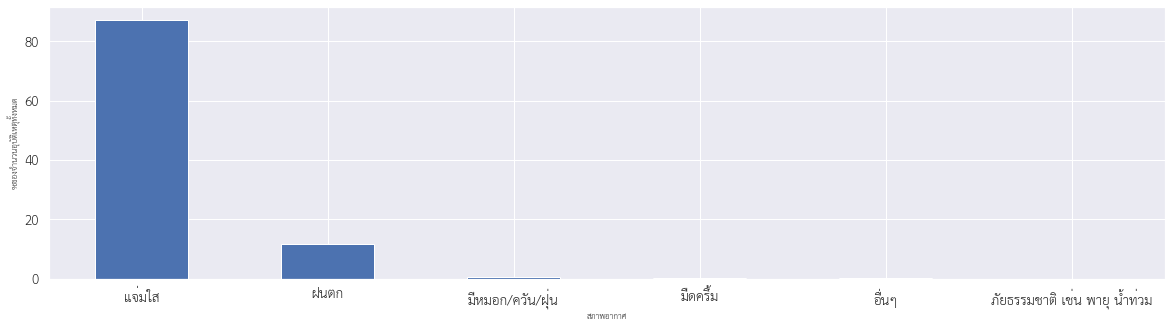

In [14]:
weather1=pd.DataFrame(df['สภาพอากาศ'].value_counts(ascending=False))
weather1=weather1[['สภาพอากาศ']].apply(lambda x: x/weather1['สภาพอากาศ'].sum()*100)
weather1.plot.bar(xlabel='สภาพอากาศ', ylabel='%ของจำนวนอุบัติเหตุทั้งหมด',rot=0, legend=None, figsize=(20,5), fontsize=20)

In [15]:
weather_dead=dead.groupby('สภาพอากาศ').agg(accident_with_dead=('สภาพอากาศ','count')).sort_values(by=['accident_with_dead'],ascending=False)
weather_dead

,accident_with_dead
สภาพอากาศ,
แจ่มใส,1094
ฝนตก,82
มีหมอก/ควัน/ฝุ่น,13
มืดครึ้ม,13
อื่นๆ,3
ภัยธรรมชาติ เช่น พายุ น้ำท่วม,1


## **อะไรคือมูลเหตุสันนิษฐานหลักของการเกิดอุบัติเหตุในแต่ละครั้ง?**

In [16]:
col = list(df)
print(col)

['ปีที่เกิดเหตุ', 'วันที่เกิดเหตุ', 'เวลา', 'วันที่รายงาน', 'เวลาที่รายงาน', 'ACC_CODE', 'หน่วยงาน', 'รหัสสายทาง', 'สายทาง', 'ก.ม.', 'จังหวัด', 'รถคันที่ 1', 'บริเวณที่เกิดเหตุ/ลักษณะทาง', 'มูลเหตุสันนิษฐาน', 'ลักษณะการเกิดอุบัติเหตุ', 'สภาพอากาศ', 'LATITUDE', 'LONGITUDE', 'จำนวนรถที่เกิดเหตุ (รวมคันที่ 1)', 'จำนวนที่เกิดเหตุทั้งหมด (รวมคนเดินเท้า)', 'รถจักรยานยนต์', 'รถสามล้อเครื่อง', 'รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ', 'รถตู้', 'รถปิคอัพโดยสาร', 'รถโดยสารมากกว่า 4 ล้อ', 'รถปิคอัพบรรทุก 4 ล้อ', 'รถบรรทุก 6 ล้อ', 'รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ', 'รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง)', 'รถอีแต๋น', 'อื่นๆ', 'คนเดินเท้า', 'จำนวนผู้เสียชีวิต', 'จำนวนผู้บาดเจ็บสาหัส', 'จำนวนผู้บาดเจ็บเล็กน้อย', 'รวมจำนวนผู้บาดเจ็บ']


In [17]:
#Combine all dead and injury people as a new column
df['รวมจำนวนผู้เสียชีวิตและบาดเจ็บ']=df['จำนวนผู้เสียชีวิต']+df['รวมจำนวนผู้บาดเจ็บ']
df

,ปีที่เกิดเหตุ,วันที่เกิดเหตุ,เวลา,วันที่รายงาน,เวลาที่รายงาน,ACC_CODE,หน่วยงาน,รหัสสายทาง,สายทาง,ก.ม.,...,รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ,รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง),รถอีแต๋น,อื่นๆ,คนเดินเท้า,จำนวนผู้เสียชีวิต,จำนวนผู้บาดเจ็บสาหัส,จำนวนผู้บาดเจ็บเล็กน้อย,รวมจำนวนผู้บาดเจ็บ,รวมจำนวนผู้เสียชีวิตและบาดเจ็บ
0,2022,1/1/2022,0,2/1/2022,11:45,6566872,กรมทางหลวงชนบท,ชน.5016,เทศบาลตำบลวัดสิงห์ - บ้านน้ำพุ (ช่วงหันคา),17.430,...,0,0,0,0,0,0,1,0,1,1
1,2022,1/1/2022,0,2/1/2022,11:44,6566880,กรมทางหลวงชนบท,มค.4012,แยกทางหลวงหมายเลข 2152 (กม.ที่ 31+700) - บ้านก...,0.500,...,0,0,0,0,0,0,0,1,1,1
2,2022,1/1/2022,0,9/2/2022,8:41,5706553,กรมทางหลวง,4,พ่อตาหินช้าง - วังครก,469.800,...,0,0,0,0,0,1,0,0,0,1
3,2022,1/1/2022,0,2/1/2022,6:21,5485750,กรมทางหลวง,4030,ถลาง - หาดราไวย์,17.125,...,0,0,0,0,0,0,0,1,1,1
4,2022,1/1/2022,0,24/1/2022,9:59,5624452,กรมทางหลวง,216,ถนนวงแหวนรอบเมืองอุดรธานีด้านทิศตะวันออก,25.350,...,0,0,0,0,0,0,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10786,2022,30/6/2022,20,14/7/2022,11:26,6549140,กรมทางหลวง,304,ปากเกร็ด - คลองประปา,3.530,...,0,0,0,0,0,0,0,0,0,0
10787,2022,30/6/2022,20,6/7/2022,9:46,6501369,กรมทางหลวง,23,เสลภูมิ - ยโสธร,172.540,...,0,0,0,0,0,0,0,1,1,1
10788,2022,30/6/2022,23,11/7/2022,9:05,6531356,กรมทางหลวง,32,ไชโย - สิงห์ใต้,82.620,...,1,0,0,0,0,1,0,0,0,1
10789,2022,30/6/2022,23,6/9/2022,19:25,6853551,กรมทางหลวง,331,สี่แยกนาน้อย - เขาหินซ้อน,139.055,...,0,0,0,0,0,0,0,0,0,0


มูลเหตุสันนิษฐานมีข้อมูลไม่ครบ แต่เนื่องจากชุดข้อมูลมีจำนวนมากพอที่จะบอกค่าสถิติได้ จึงยังคงใช้ข้อมูลที่มีเพื่อดูค่าทางสิติ

In [18]:
df['มูลเหตุสันนิษฐาน'].isna().sum()

427

In [19]:
#Prepare datafram for find the possible main cause
cause=df[['มูลเหตุสันนิษฐาน','จำนวนผู้เสียชีวิต', 'จำนวนผู้บาดเจ็บสาหัส', 'จำนวนผู้บาดเจ็บเล็กน้อย', 'รวมจำนวนผู้บาดเจ็บ','รวมจำนวนผู้เสียชีวิตและบาดเจ็บ']].groupby('มูลเหตุสันนิษฐาน')
cause.agg('sum').sort_values(by=['รวมจำนวนผู้เสียชีวิตและบาดเจ็บ'], ascending=False)

,จำนวนผู้เสียชีวิต,จำนวนผู้บาดเจ็บสาหัส,จำนวนผู้บาดเจ็บเล็กน้อย,รวมจำนวนผู้บาดเจ็บ,รวมจำนวนผู้เสียชีวิตและบาดเจ็บ
มูลเหตุสันนิษฐาน,,,,,
ขับรถเร็วเกินอัตรากำหนด,1002,1030,4770,5800,6802
คน/รถ/สัตว์ตัดหน้ากระชั้นชิด,213,181,708,889,1102
หลับใน,63,91,523,614,677
อุปกรณ์ยานพาหนะบกพร่อง,22,40,233,273,295
ฝ่าฝืนสัญญาณไฟ/เครื่องหมายจราจร,18,38,136,174,192
เมาสุรา,25,38,127,165,190
แซงรถอย่างผิดกฎหมาย,21,13,53,66,87
ไม่คุ้นเคยเส้นทาง/ขับรถไม่ชำนาญ,8,14,46,60,68
อื่นๆ,2,5,25,30,32


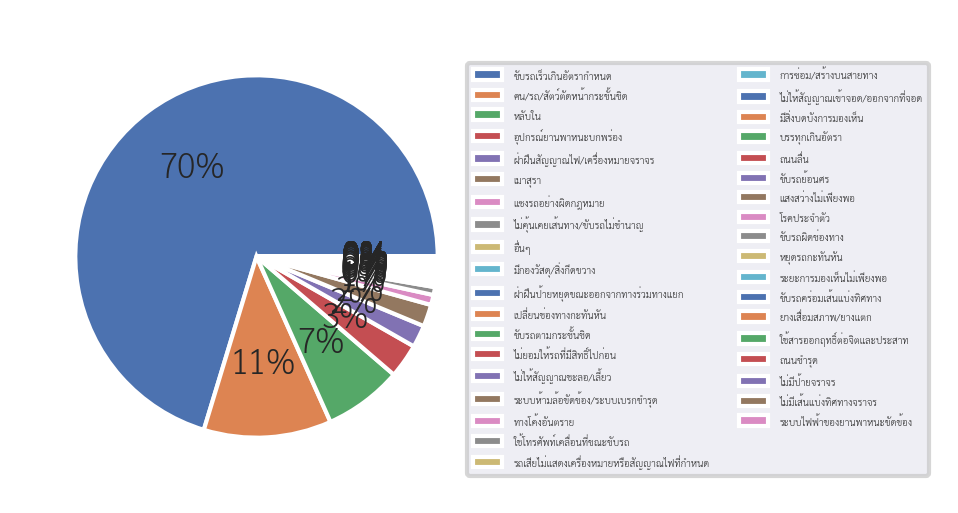

In [20]:
#plot for bar chart
total=df.groupby(['มูลเหตุสันนิษฐาน'])[['รวมจำนวนผู้เสียชีวิตและบาดเจ็บ']].sum()
total.reset_index(drop=False,inplace=True)
total=total.sort_values(by=['รวมจำนวนผู้เสียชีวิตและบาดเจ็บ'], ascending=False)
cause_list = total['มูลเหตุสันนิษฐาน'].values.tolist()
data_list = total['รวมจำนวนผู้เสียชีวิตและบาดเจ็บ'].values.tolist()
plt.rcParams['font.family']='TH Sarabun Chula'
fig = plt.figure(figsize=(2,2), dpi=300)
plt.pie(data_list,labels=None,autopct='%.0f%%')
plt.legend(cause_list, fontsize=3.5 ,loc='lower right', bbox_to_anchor=(2,0), ncol=2)

In [21]:
total.reset_index(drop=True)
total

,มูลเหตุสันนิษฐาน,รวมจำนวนผู้เสียชีวิตและบาดเจ็บ
5,ขับรถเร็วเกินอัตรากำหนด,6802
6,คน/รถ/สัตว์ตัดหน้ากระชั้นชิด,1102
21,หลับใน,677
23,อุปกรณ์ยานพาหนะบกพร่อง,295
12,ฝ่าฝืนสัญญาณไฟ/เครื่องหมายจราจร,192
25,เมาสุรา,190
26,แซงรถอย่างผิดกฎหมาย,87
31,ไม่คุ้นเคยเส้นทาง/ขับรถไม่ชำนาญ,68
22,อื่นๆ,32
13,มีกองวัสดุ/สิ่งกีดขวาง,31


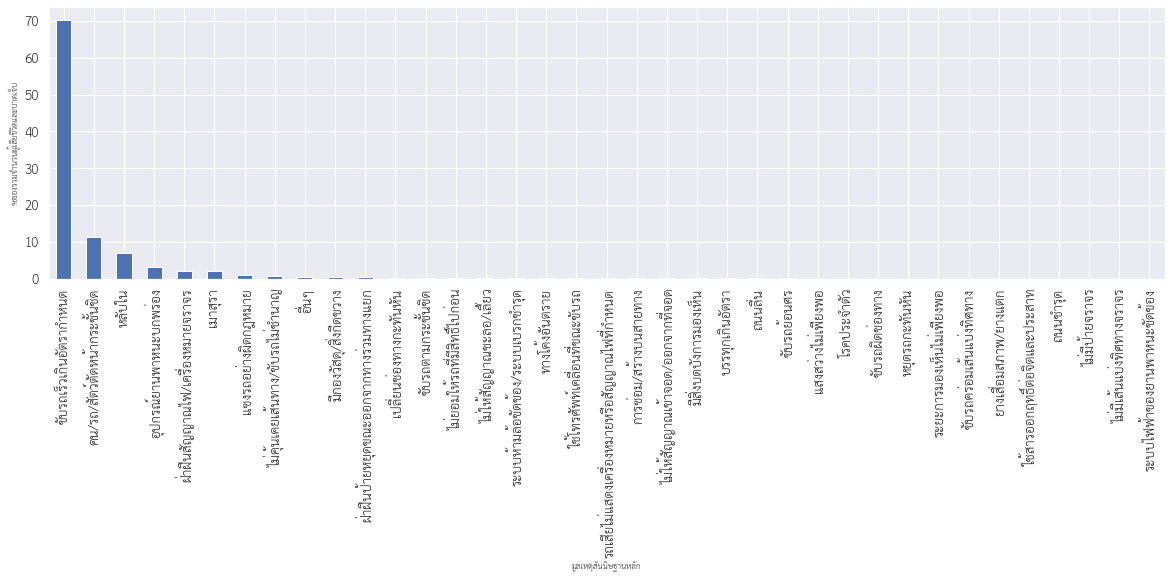

In [23]:
total['%']=total[['รวมจำนวนผู้เสียชีวิตและบาดเจ็บ']].apply(lambda x: x/total['รวมจำนวนผู้เสียชีวิตและบาดเจ็บ'].sum()*100)
total
total.plot.bar(x='มูลเหตุสันนิษฐาน', y='%' ,xlabel='มูลเหตุสันนิษฐานหลัก', ylabel='%ของรวมจำนวนผู้เสียชีวิตและบาดเจ็บ', legend=None, figsize=(20,5), fontsize=20)

## **จากมูลเหตุสันนิษฐานหลัก ทำให้เกิดลักษณะอุบัติเหตุแบบใดบ้าง และมีการสูญเสียเป็นอย่างไร?**

In [24]:
#filter the main cause from exceeding the speed limit and drop the NA row in column 'มูลเหตุสัษฐาน'
speed=df.dropna(subset=['มูลเหตุสันนิษฐาน']).reset_index()
speed=speed.loc[speed['มูลเหตุสันนิษฐาน'].str.contains('เร็วเกิน', case=False)]

In [25]:
speed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7845 entries, 2 to 10363
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   index                                    7845 non-null   int64  
 1   ปีที่เกิดเหตุ                            7845 non-null   int64  
 2   วันที่เกิดเหตุ                           7845 non-null   object 
 3   เวลา                                     7845 non-null   int64  
 4   วันที่รายงาน                             7844 non-null   object 
 5   เวลาที่รายงาน                            7844 non-null   object 
 6   ACC_CODE                                 7845 non-null   int64  
 7   หน่วยงาน                                 7845 non-null   object 
 8   รหัสสายทาง                               7845 non-null   object 
 9   สายทาง                                   7845 non-null   object 
 10  ก.ม.                                     7821 n

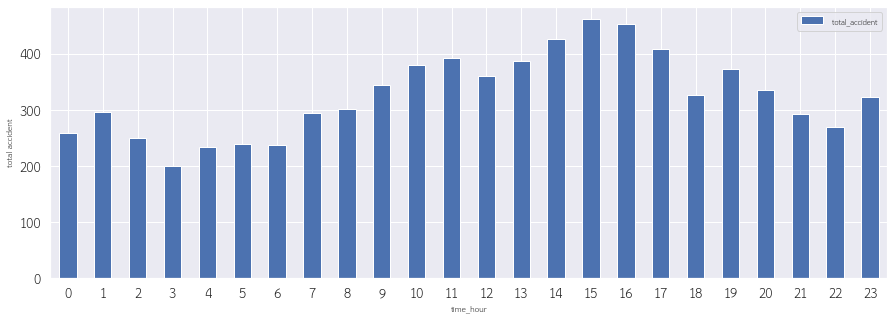

In [26]:
speed_time=speed.groupby('เวลา').agg(total_accident=('มูลเหตุสันนิษฐาน','count'))
speed_time.plot.bar(xlabel='time_hour',ylabel='total accident',rot=0, figsize=(15,5),edgecolor='white',fontsize=20)

จังหวัดที่มีอุบัติเหตุเกิดขึ้นเนื่องจากมูลเหตุสันนิษฐานหลักคือการใช้ความเร็วเกินอัตรามากแตกต่างจากจังหวัดอื่นๆ คือ ชลบุรี กรุงเทพมหานคร เชียงใหม่ และนครราชสีมา

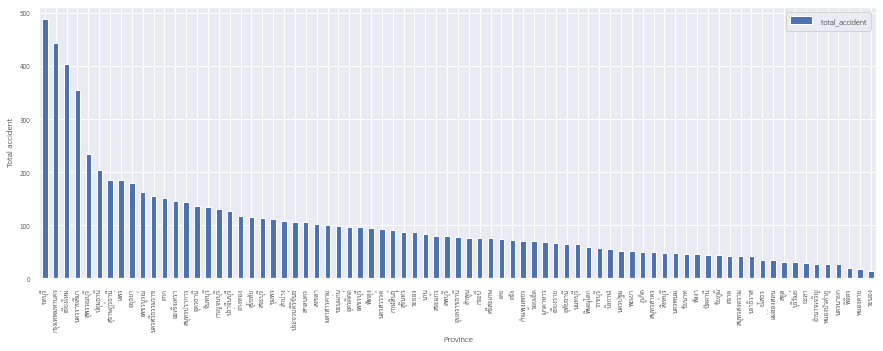

In [27]:
speed_province=speed.groupby('จังหวัด').agg(total_accident=('เวลา','count')).sort_values(by=['total_accident'], ascending=False)
speed_province.plot.bar(xlabel='Province',ylabel='Total accident', figsize=(15,5),edgecolor='white',fontsize=10)

จากจังหวัดที่มีจำนวนอุบัติเหตุจากมูลเหตุสันนิษฐานหลักคือการใช้ความเร็วเกินอัตรา 4 จังหวัด เมื่อลองดูจำนวนผู้เสียชีวิตและผู้ได้รับบาดเจ็บด้วยแล้ว จะพบว่าจังหวัดชลบุรีถึงแม้ว่าจะมีจำนวนอุบัติเหตุมากสุด แต่จังหวัดนครศรีธรรมราชมีแนวโน้มว่าโอกาสที่จะมีผู้เสียชีวิตในเหตุการณ์เยอะที่สุด (ดูจาก อัตราส่วนของจำนวนอุบัติเหตุที่มีผู้เสียชีวิตและจำนวนอุบัติเหตุที่มีมูลเหตุสันนิษฐานหลักจากการใช้ความเร็วเกินกำหนดทั้งหมดในจังหวัดนั้นๆ)

In [28]:
top_speed=speed.loc[speed['จังหวัด'].str.contains('ชลบุรี',case=False)|speed['จังหวัด'].str.contains('กรุงเทพ',case=False)|speed['จังหวัด'].str.contains('เชียงใหม่',case=False)|speed['จังหวัด'].str.contains('นครราชสีมา',case=False)]
top_speed

,index,ปีที่เกิดเหตุ,วันที่เกิดเหตุ,เวลา,วันที่รายงาน,เวลาที่รายงาน,ACC_CODE,หน่วยงาน,รหัสสายทาง,สายทาง,...,รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ,รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง),รถอีแต๋น,อื่นๆ,คนเดินเท้า,จำนวนผู้เสียชีวิต,จำนวนผู้บาดเจ็บสาหัส,จำนวนผู้บาดเจ็บเล็กน้อย,รวมจำนวนผู้บาดเจ็บ,รวมจำนวนผู้เสียชีวิตและบาดเจ็บ
10,10,2022,1/1/2022,0,2/1/2022,10:33,5486896,กรมทางหลวง,290,ถนนวงแหวนรอบเมืองนครราชสีมาด้านทิศเหนือ,...,0,0,0,0,0,0,0,1,1,1
16,16,2022,1/1/2022,0,22/3/2022,15:04,5957316,กรมทางหลวง,2,โคกกรวด - นครราชสีมา,...,0,0,0,0,0,1,0,0,0,1
33,33,2022,1/1/2022,1,30/3/2022,11:31,6004293,กรมทางหลวง,11,อุโมงค์ - กองบิน 41,...,0,0,0,0,0,0,0,1,1,1
42,42,2022,1/1/2022,2,22/3/2022,9:41,5955804,กรมทางหลวง,2,ดอนหวาย - บ้านวัด,...,0,0,0,1,0,0,0,0,0,0
53,53,2022,1/1/2022,3,25/3/2022,13:52,5976094,กรมทางหลวง,2,ดอนหวาย - บ้านวัด,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10345,10772,2022,30/6/2022,14,22/8/2022,11:45,6765539,กรมทางหลวง,304,วังน้ำเขียว - ดอนขวาง,...,0,1,0,0,0,0,0,0,0,0
10349,10776,2022,30/6/2022,15,1/7/2022,10:29,6471763,กรมทางหลวง,9,แขวงรามอินทรา - บางพลี,...,0,1,0,0,0,0,0,0,0,0
10352,10779,2022,30/6/2022,17,15/7/2022,13:30,6554251,กรมทางหลวง,9,แขวงรามอินทรา - บางพลี,...,0,0,0,0,0,0,0,1,1,1
10353,10780,2022,30/6/2022,17,21/7/2022,9:48,6584801,กรมทางหลวง,1103,พระบาทตะเมาะ - ฮอด,...,0,0,0,0,0,0,0,1,1,1


In [29]:
top_speed1=top_speed.groupby(['จังหวัด'])[['จำนวนผู้เสียชีวิต', 'จำนวนผู้บาดเจ็บสาหัส', 'จำนวนผู้บาดเจ็บเล็กน้อย', 'รวมจำนวนผู้บาดเจ็บ','รวมจำนวนผู้เสียชีวิตและบาดเจ็บ']].sum()
top_speed1

,จำนวนผู้เสียชีวิต,จำนวนผู้บาดเจ็บสาหัส,จำนวนผู้บาดเจ็บเล็กน้อย,รวมจำนวนผู้บาดเจ็บ,รวมจำนวนผู้เสียชีวิตและบาดเจ็บ
จังหวัด,,,,,
กรุงเทพมหานคร,11,19,203,222,233
ชลบุรี,11,24,164,188,199
นครราชสีมา,53,35,253,288,341
เชียงใหม่,34,42,231,273,307


In [30]:
lambda_function = lambda top_speed: pd.Series({'จำนวนอุบัติเหตุที่มีผู้เสียชีวิต':sum(top_speed['จำนวนผู้เสียชีวิต']>0)})
tp_dead=top_speed.groupby('จังหวัด').apply(lambda_function)
tp_dead

,จำนวนอุบัติเหตุที่มีผู้เสียชีวิต
จังหวัด,
กรุงเทพมหานคร,9
ชลบุรี,10
นครราชสีมา,43
เชียงใหม่,26


In [31]:
lambda_function = lambda top_speed: pd.Series({'จำนวนอุบัติเหตุที่มีผู้บาดเจ็บ':sum(top_speed['รวมจำนวนผู้บาดเจ็บ']>0)})
tp_injur=top_speed.groupby('จังหวัด').apply(lambda_function)
tp_injur

,จำนวนอุบัติเหตุที่มีผู้บาดเจ็บ
จังหวัด,
กรุงเทพมหานคร,131
ชลบุรี,133
นครราชสีมา,159
เชียงใหม่,225


In [32]:
top_speed2=top_speed.groupby('จังหวัด').agg(total_accident=('จังหวัด','count')).sort_values(by=['total_accident'], ascending=False)
top_speed2

,total_accident
จังหวัด,
ชลบุรี,487
กรุงเทพมหานคร,442
เชียงใหม่,403
นครราชสีมา,355


In [33]:
top_speed3=pd.merge(pd.merge(top_speed2, tp_injur, left_index=True, right_index=True),tp_dead, left_index=True, right_index=True)
top_speed3

,total_accident,จำนวนอุบัติเหตุที่มีผู้บาดเจ็บ,จำนวนอุบัติเหตุที่มีผู้เสียชีวิต
จังหวัด,,,
ชลบุรี,487,133,10
กรุงเทพมหานคร,442,131,9
เชียงใหม่,403,225,26
นครราชสีมา,355,159,43


In [34]:
top_speed4=top_speed3[['จำนวนอุบัติเหตุที่มีผู้บาดเจ็บ','จำนวนอุบัติเหตุที่มีผู้เสียชีวิต']].apply(lambda x: x/top_speed3['total_accident']*100)
top_speed4.round()

,จำนวนอุบัติเหตุที่มีผู้บาดเจ็บ,จำนวนอุบัติเหตุที่มีผู้เสียชีวิต
จังหวัด,,
ชลบุรี,27.0,2.0
กรุงเทพมหานคร,30.0,2.0
เชียงใหม่,56.0,6.0
นครราชสีมา,45.0,12.0


โดยจากอุบัติที่เหตุสันนิษฐานว่าเกิดจากการใช้ความเร็ว ทำให้เกิดลักษณะอุบัติเหตุแบบชนท้ายมากที่สุด โดยเฉพาะรถจักรยานยนต์ชนท้าย ที่มีจำนวนผู้เสียชีวิตสะสมจากอุบัติเหตุมากที่สุด (ไม่ระบุว่าผู้ชนหรือถูกชนเสียชีวิต)

In [35]:
#How the accident are possible happened due to exceed the speed limit
speed_how=pd.DataFrame(speed['ลักษณะการเกิดอุบัติเหตุ'].value_counts(ascending=False))
speed_how

,ลักษณะการเกิดอุบัติเหตุ
พลิกคว่ำ/ตกถนนในทางตรง,3593
ชนท้าย,2248
พลิกคว่ำ/ตกถนนในทางโค้ง,1071
ชนในทิศทางตรงกันข้าม (ไม่ใช่การแซง),290
ชนสิ่งกีดขวาง (บนผิวจราจร),204
ชนคนเดินเท้า,82
อื่นๆ,47
ชนเป็นมุมบริเวณทางแยก,41
ชนด้านข้าง,3
เลี้ยว/ถอยชน,1


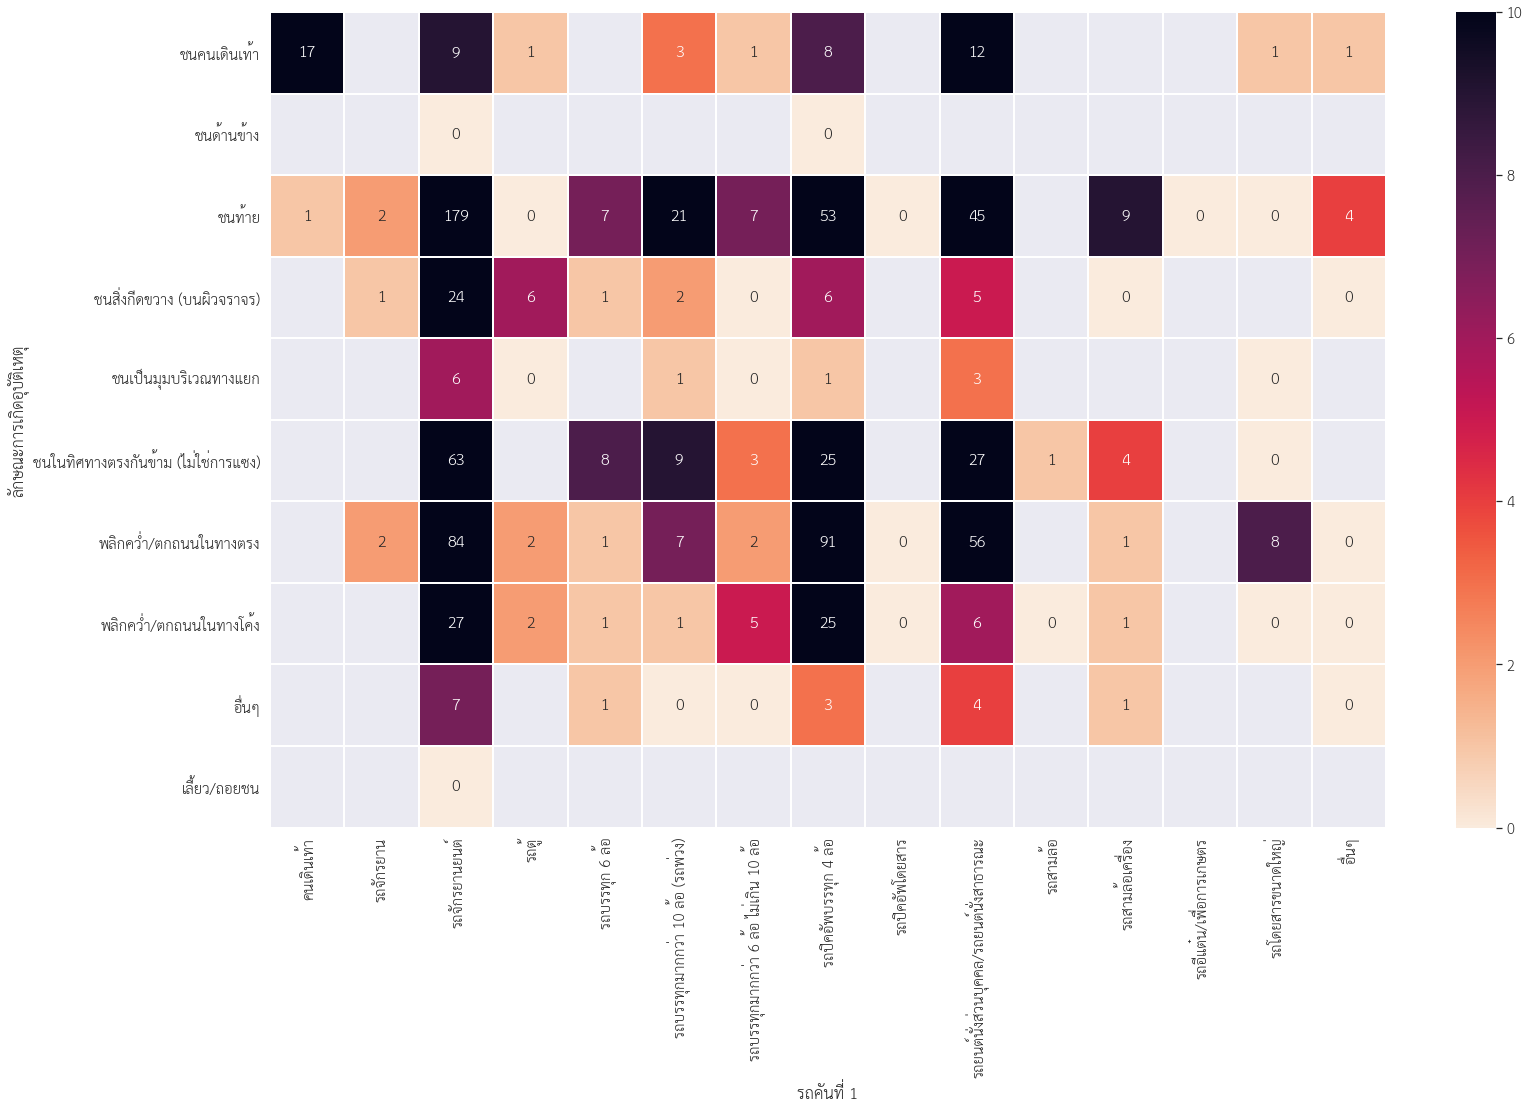

In [36]:
#adding parameter of type of root cuase
speed_lost_sum=speed.pivot_table(index='ลักษณะการเกิดอุบัติเหตุ', columns='รถคันที่ 1', values='จำนวนผู้เสียชีวิต', aggfunc='sum')
sns.set(rc={'figure.figsize':(25,15)},font_scale=2,font='TH Sarabun Chula')
ax = sns.heatmap(speed_lost_sum, linewidths=1, vmin=0, cmap='rocket_r', vmax=10,annot=True, fmt='.0f')